In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/턱수염2/data/최종/time_series.csv")

In [ ]:
df

,정류장,합계,04,05,06,07,08,09,10,11,...,12월_장애인_승객수,1월_장애인_승객수,2월_장애인_승객수,3월_장애인_승객수,4월_장애인_승객수,5월_장애인_승객수,평균_장애인_승객수,총_장애인_승객수,장애인_편의시설_설치율,승강기_개수
0,가락시장,14858.000000,43.416667,284.333333,367.083333,607.750000,690.500000,699.166667,905.500000,1028.250000,...,16820,13132,12952,14701,13690,13948,6177.076389,74124.916667,99.42,9.0
1,가산디지털단지,20509.416667,26.416667,167.500000,262.916667,428.833333,372.250000,441.666667,610.666667,822.916667,...,20981,19026,19638,21660,19960,20916,9136.111111,109633.333333,99.91,4.0
2,가양,31726.666667,26.833333,1581.916667,1330.833333,2237.250000,2970.333333,3037.833333,2522.416667,2346.750000,...,34249,27566,27941,31936,31080,31412,13535.798611,162429.583333,99.90,3.0
3,강남,23879.416667,7.250000,246.750000,530.083333,493.083333,599.666667,607.416667,1011.583333,1191.833333,...,26125,21984,22708,24815,22851,22939,10408.756944,124905.083333,99.39,4.0
4,강남구청,6326.333333,1.250000,106.000000,163.916667,192.166667,181.500000,234.250000,311.500000,289.166667,...,6614,5698,5999,6665,6217,6393,2796.083333,33553.000000,98.98,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,화곡,23547.666667,17.833333,1142.666667,1229.083333,2023.750000,2444.416667,1845.833333,1790.000000,1805.750000,...,24965,20974,21515,24726,23076,23625,10284.083333,123409.000000,99.90,2.0
237,화랑대(서울여대입구),7097.083333,19.500000,235.666667,491.166667,742.000000,870.333333,561.416667,479.500000,396.583333,...,7245,6433,6574,7719,7125,7026,3148.618056,37783.416667,99.28,4.0
238,회현(남대문시장),19125.250000,2.750000,61.333333,89.166667,186.833333,334.416667,429.250000,632.416667,1077.166667,...,20539,15194,17195,19943,17874,19905,8135.020833,97620.250000,98.40,2.0
239,효창공원앞,5460.083333,0.083333,94.833333,200.500000,506.333333,578.750000,356.750000,358.083333,345.500000,...,5669,4589,4926,5710,5248,5651,2358.416667,28301.000000,99.65,2.0


In [ ]:
df.columns

Index(['정류장', '합계', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01',
       '02', '호선_개수', '노선', '위도', '경도', '지역구', '주거_장애인_수', '6월_장애인_승객수',
       '7월_장애인_승객수', '8월_장애인_승객수', '9월_장애인_승객수', '10월_장애인_승객수', '11월_장애인_승객수',
       '12월_장애인_승객수', '1월_장애인_승객수', '2월_장애인_승객수', '3월_장애인_승객수', '4월_장애인_승객수',
       '5월_장애인_승객수', '평균_장애인_승객수', '총_장애인_승객수', '장애인_편의시설_설치율', '승강기_개수'],
      dtype='object')

### 종로3가

In [ ]:
def newdf(df):
    df=df.drop(['합계'],axis=1)
    time=df.columns
    df=df.T
    df['시간'] = time
    df.columns=['이용자수_평균','시간']

    return df

In [ ]:
top3=df.nlargest(3, '합계')
top3.set_index('정류장', inplace=True)
종로3가=top3.loc[['종로3가']]
종로3가
종로3가=newdf(종로3가)
종로3가

,이용자수_평균,시간
04,15.833333,04
05,327.0,05
06,393.416667,06
07,518.333333,07
08,838.5,08
09,1378.583333,09
10,2113.833333,10
11,2968.916667,11
12,4371.416667,12
13,4563.666667,13


In [ ]:
onlytime_종로3가=종로3가.loc[['04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','00','01','02']]
onlytime_종로3가

,이용자수_평균,시간
04,15.833333,04
05,327.0,05
06,393.416667,06
07,518.333333,07
08,838.5,08
09,1378.583333,09
10,2113.833333,10
11,2968.916667,11
12,4371.416667,12
13,4563.666667,13


In [ ]:
onlytime_종로3가["호선_개수"] = [종로3가.loc['호선_개수','이용자수_평균']]*len(onlytime_종로3가.index)
onlytime_종로3가['승강기_개수'] = [종로3가.loc['승강기_개수','이용자수_평균']]*len(onlytime_종로3가.index)
onlytime_종로3가["장애인_편의시설_설치율"] = [종로3가.loc['장애인_편의시설_설치율','이용자수_평균']]*len(onlytime_종로3가.index)
onlytime_종로3가["평균_장애인_승객수"] = [종로3가.loc['평균_장애인_승객수','이용자수_평균']]*len(onlytime_종로3가.index)
onlytime_종로3가["주거_장애인_수"] = [종로3가.loc['주거_장애인_수','이용자수_평균']]*len(onlytime_종로3가.index)

In [ ]:
onlytime_종로3가

,이용자수_평균,시간,호선_개수,승강기_개수,장애인_편의시설_설치율,평균_장애인_승객수,주거_장애인_수
04,15.833333,04,3,6.0,99.63,25021.930556,5834
05,327.0,05,3,6.0,99.63,25021.930556,5834
06,393.416667,06,3,6.0,99.63,25021.930556,5834
07,518.333333,07,3,6.0,99.63,25021.930556,5834
08,838.5,08,3,6.0,99.63,25021.930556,5834
09,1378.583333,09,3,6.0,99.63,25021.930556,5834
10,2113.833333,10,3,6.0,99.63,25021.930556,5834
11,2968.916667,11,3,6.0,99.63,25021.930556,5834
12,4371.416667,12,3,6.0,99.63,25021.930556,5834
13,4563.666667,13,3,6.0,99.63,25021.930556,5834


In [ ]:
onlytime_종로3가.set_index("시간", inplace=True)

In [ ]:
onlytime_종로3가.dtypes

이용자수_평균          object
호선_개수             int64
승강기_개수          float64
장애인_편의시설_설치율    float64
평균_장애인_승객수      float64
주거_장애인_수          int64
dtype: object

In [ ]:
onlytime_종로3가["이용자수_평균"] = onlytime_종로3가["이용자수_평균"].astype(float)

In [ ]:
from statsmodels.tsa.stattools import adfuller


# ADF 검정 수행
result = adfuller(onlytime_종로3가["이용자수_평균"])

# 결과 출력
print('ADF 검정 통계량:', result[0])
print('P-value:', result[1])
print('사용된 시차:', result[2])
print('관측치 개수:', result[3])
print('임계값:', result[4])
print('결과:', '정상성 만족' if result[1] < 0.05 else '정상성 불만족')

ADF 검정 통계량: 0.3330743125696331
P-value: 0.9788120568912262
사용된 시차: 9
관측치 개수: 13
임계값: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}
결과: 정상성 불만족


In [ ]:
onlytime_종로3가_diff1 = onlytime_종로3가.diff().dropna()

# ADF 검정 수행
result = adfuller(onlytime_종로3가_diff1["이용자수_평균"])

# 결과 출력
print('ADF 검정 통계량:', result[0])
print('P-value:', result[1])
print('사용된 시차:', result[2])
print('관측치 개수:', result[3])
print('임계값:', result[4])
print('결과:', '정상성 만족' if result[1] < 0.05 else '정상성 불만족')

ADF 검정 통계량: -5.7983104746147545
P-value: 4.6950857008322006e-07
사용된 시차: 9
관측치 개수: 12
임계값: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
결과: 정상성 만족


-> d=1로 결정

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima


# ARIMAX 모델의 최적의 차수 찾기 d=1로 설정(위에서 찾은거 라서)
model = auto_arima(y=onlytime_종로3가["이용자수_평균"],
                   exogenous=onlytime_종로3가[['호선_개수', '승강기_개수', '장애인_편의시설_설치율', '평균_장애인_승객수', '주거_장애인_수']],
                   seasonal=False,
                   trace=True,
                   d=1)

# 최적의 차수 출력
print(model.order)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=357.401, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=348.245, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=352.441, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=355.401, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=349.625, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=349.617, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=351.587, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=346.247, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=347.628, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=347.619, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=350.436, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=349.590, Time=0.24 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.592 seconds
(1, 1, 0)


In [ ]:
# ARIMAX 모델 생성 및 적합
model1 = sm.tsa.ARIMA(onlytime_종로3가["이용자수_평균"], order=(1, 1, 0), exog=onlytime_종로3가[['호선_개수', '승강기_개수', '장애인_편의시설_설치율', '평균_장애인_승객수', '주거_장애인_수']])
results1 = model1.fit()

# 모델 요약 정보 출력
print(results1.summary())

                               SARIMAX Results                                
Dep. Variable:                이용자수_평균   No. Observations:                   23
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -171.030
Date:                Tue, 07 May 2024   AIC                            356.061
Time:                        12:06:51   BIC                            363.698
Sample:                             0   HQIC                           357.860
                                 - 23                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
호선_개수        -6.344e-06      1.955  -3.24e-06      1.000      -3.832       3.832
승강기_개수       -1.269e-05      3.910  -3.24e-06      1.000      -7.664       7.664
장애인_편의시설_설치율    -0.0002     64.928  -3.24e-0

In [ ]:
onlytime_종로3가

,이용자수_평균,호선_개수,승강기_개수,장애인_편의시설_설치율,평균_장애인_승객수,주거_장애인_수
시간,,,,,,
04,15.833333,3,6.0,99.63,25021.930556,5834
05,327.000000,3,6.0,99.63,25021.930556,5834
06,393.416667,3,6.0,99.63,25021.930556,5834
07,518.333333,3,6.0,99.63,25021.930556,5834
08,838.500000,3,6.0,99.63,25021.930556,5834
09,1378.583333,3,6.0,99.63,25021.930556,5834
10,2113.833333,3,6.0,99.63,25021.930556,5834
11,2968.916667,3,6.0,99.63,25021.930556,5834
12,4371.416667,3,6.0,99.63,25021.930556,5834


In [ ]:
fc1=results1.predict(n_periods=1, exogenous=onlytime_종로3가[['호선_개수', '승강기_개수', '장애인_편의시설_설치율', '평균_장애인_승객수', '주거_장애인_수']])
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
prediction_종로3가= pd.DataFrame({'이용자수예측':fc1}, index=fc1.index)
prediction_종로3가
prediction_종로3가['비율'] = prediction_종로3가['이용자수예측'] / prediction_종로3가['이용자수예측'].sum()
prediction_종로3가

,이용자수예측,비율
시간,,
04,-1399.0456,-0.0248
05,327.0051,0.0058
06,519.3713,0.0092
07,434.4772,0.0077
08,595.5601,0.0106
09,1036.4354,0.0184
10,1712.4769,0.0304
11,2568.3840,0.0456
12,3497.5515,0.0620


In [ ]:
prediction_종로3가 = prediction_종로3가[1:21]
prediction_종로3가

,이용자수예측,비율
시간,,
05,327.0051,0.0058
06,519.3713,0.0092
07,434.4772,0.0077
08,595.5601,0.0106
09,1036.4354,0.0184
10,1712.4769,0.0304
11,2568.3840,0.0456
12,3497.5515,0.0620
13,5238.4787,0.0929


In [ ]:
onlytime_종로3가 = onlytime_종로3가[1:21]
fc1 = fc1[1:21]

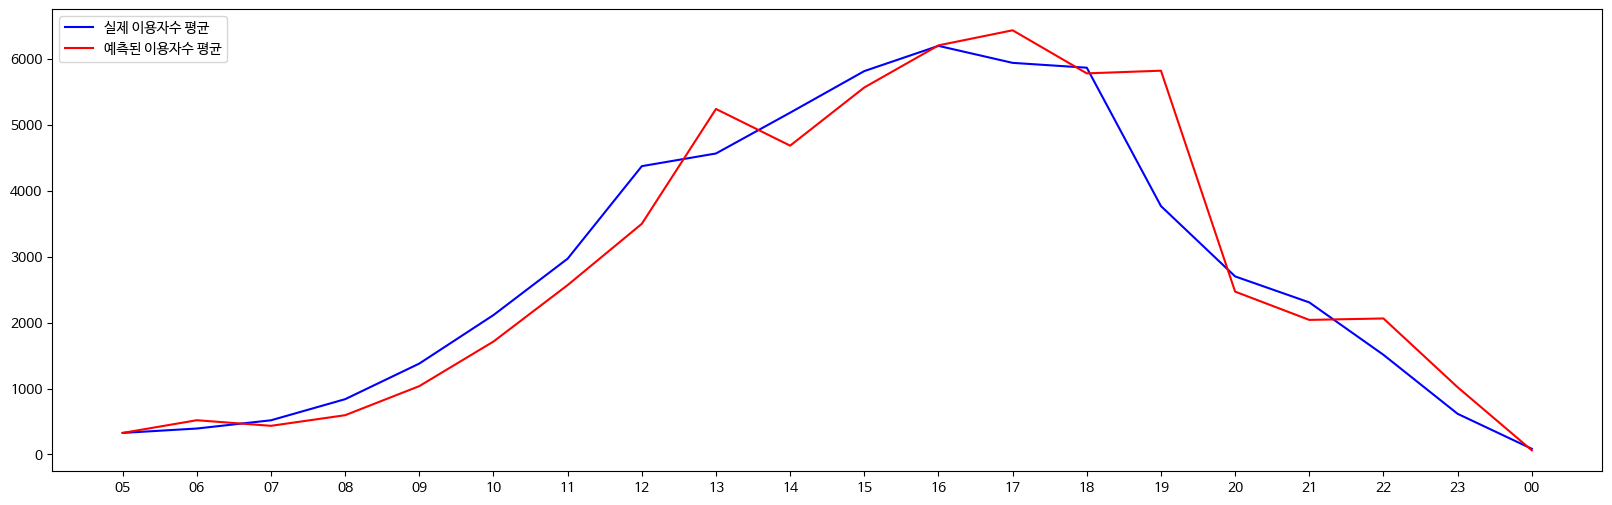

In [ ]:
##라벨만 붙여주세욥!!!!!

# Plot
plt.figure(figsize=(20,6))
#plt.plot(train1, label='train_data')
plt.plot(onlytime_종로3가['이용자수_평균'], c='b', label='실제 이용자수 평균')
plt.plot(fc1, c='r',label='예측된 이용자수 평균')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.legend(loc='upper left')
plt.show()

### 서울역

In [ ]:
서울역=top3.loc[['서울역']]
서울역
서울역=newdf(서울역)
서울역

,이용자수_평균,시간
04,97.9167,04
05,661.6667,05
06,745.9167,06
07,1494.6667,07
08,2134.1667,08
09,2069.0833,09
10,2513.1667,10
11,3156.0833,11
12,3345.2500,12
13,3119.4167,13


In [ ]:
onlytime_서울역=서울역.loc[['04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','00','01','02']]
onlytime_서울역

,이용자수_평균,시간
04,97.9167,04
05,661.6667,05
06,745.9167,06
07,1494.6667,07
08,2134.1667,08
09,2069.0833,09
10,2513.1667,10
11,3156.0833,11
12,3345.2500,12
13,3119.4167,13


In [ ]:
onlytime_서울역["호선_개수"] = [서울역.loc['호선_개수','이용자수_평균']]*len(onlytime_서울역.index)
onlytime_서울역['승강기_개수'] = [서울역.loc['승강기_개수','이용자수_평균']]*len(onlytime_서울역.index)
onlytime_서울역["장애인_편의시설_설치율"] = [서울역.loc['장애인_편의시설_설치율','이용자수_평균']]*len(onlytime_서울역.index)
onlytime_서울역["평균_장애인_승객수"] = [서울역.loc['평균_장애인_승객수','이용자수_평균']]*len(onlytime_서울역.index)
onlytime_서울역["주거_장애인_수"] = [서울역.loc['주거_장애인_수','이용자수_평균']]*len(onlytime_서울역.index)

In [ ]:
onlytime_서울역.set_index("시간", inplace=True)
onlytime_서울역["이용자수_평균"] = onlytime_서울역["이용자수_평균"].astype(float)

In [ ]:
from statsmodels.tsa.stattools import adfuller


# ADF 검정 수행
result = adfuller(onlytime_서울역["이용자수_평균"])

# 결과 출력
print('ADF 검정 통계량:', result[0])
print('P-value:', result[1])
print('사용된 시차:', result[2])
print('관측치 개수:', result[3])
print('임계값:', result[4])
print('결과:', '정상성 만족' if result[1] < 0.05 else '정상성 불만족')

ADF 검정 통계량: -1.0292460428892245
P-value: 0.7424486132467127
사용된 시차: 9
관측치 개수: 13
임계값: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}
결과: 정상성 불만족


In [ ]:
onlytime_서울역_diff1 = onlytime_서울역.diff().dropna()

# ADF 검정 수행
result = adfuller(onlytime_서울역_diff1["이용자수_평균"])

# 결과 출력
print('ADF 검정 통계량:', result[0])
print('P-value:', result[1])
print('사용된 시차:', result[2])
print('관측치 개수:', result[3])
print('임계값:', result[4])
print('결과:', '정상성 만족' if result[1] < 0.05 else '정상성 불만족')

ADF 검정 통계량: -2.855695563027835
P-value: 0.05074789968154762
사용된 시차: 0
관측치 개수: 21
임계값: {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}
결과: 정상성 불만족


In [ ]:
onlytime_서울역_diff2 = onlytime_서울역_diff1.diff().dropna()

# ADF 검정 수행
result = adfuller(onlytime_서울역_diff2["이용자수_평균"])

# 결과 출력
print('ADF 검정 통계량:', result[0])
print('P-value:', result[1])
print('사용된 시차:', result[2])
print('관측치 개수:', result[3])
print('임계값:', result[4])
print('결과:', '정상성 만족' if result[1] < 0.05 else '정상성 불만족')

ADF 검정 통계량: -1.9608438408343059
P-value: 0.3040010749050081
사용된 시차: 7
관측치 개수: 13
임계값: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}
결과: 정상성 불만족


=> d=2일 때 오히려 p-value 더 커짐 -> d=1일 때 0.05에 근점 따라서 d=1 적용

In [ ]:
# ARIMAX 모델의 최적의 차수 찾기 d=1로 설정(위에서 찾은거 라서)
model = auto_arima(y=onlytime_서울역["이용자수_평균"],
                   exogenous=onlytime_서울역[['호선_개수', '승강기_개수', '장애인_편의시설_설치율', '평균_장애인_승객수', '주거_장애인_수']],
                   seasonal=False,
                   trace=True,
                   d=1)

# 최적의 차수 출력
print(model.order)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=344.741, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=342.286, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=342.743, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=344.049, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=340.286, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=342.050, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.989 seconds
(1, 1, 0)


In [ ]:
# ARIMAX 모델 생성 및 적합
model2 = sm.tsa.ARIMA(onlytime_서울역["이용자수_평균"], order=(1, 1, 0), exog=onlytime_서울역[['호선_개수', '승강기_개수', '장애인_편의시설_설치율', '평균_장애인_승객수', '주거_장애인_수']])
results2 = model2.fit()

# 모델 요약 정보 출력
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:                이용자수_평균   No. Observations:                   23
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -167.609
Date:                Tue, 07 May 2024   AIC                            349.219
Time:                        12:06:54   BIC                            356.856
Sample:                             0   HQIC                           351.018
                                 - 23                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
호선_개수         3.502e-05      4.740   7.39e-06      1.000      -9.291       9.291
승강기_개수        3.505e-05      4.740   7.39e-06      1.000      -9.291       9.291
장애인_편의시설_설치율     0.0002     77.742   2.91e-0

In [ ]:
onlytime_서울역

,이용자수_평균,호선_개수,승강기_개수,장애인_편의시설_설치율,평균_장애인_승객수,주거_장애인_수
시간,,,,,,
04,97.9167,6,6.0000,98.4000,19387.5139,5552
05,661.6667,6,6.0000,98.4000,19387.5139,5552
06,745.9167,6,6.0000,98.4000,19387.5139,5552
07,1494.6667,6,6.0000,98.4000,19387.5139,5552
08,2134.1667,6,6.0000,98.4000,19387.5139,5552
09,2069.0833,6,6.0000,98.4000,19387.5139,5552
10,2513.1667,6,6.0000,98.4000,19387.5139,5552
11,3156.0833,6,6.0000,98.4000,19387.5139,5552
12,3345.2500,6,6.0000,98.4000,19387.5139,5552


In [ ]:
fc2=results2.predict(n_periods=1, exogenous=onlytime_서울역[['호선_개수', '승강기_개수', '장애인_편의시설_설치율', '평균_장애인_승객수', '주거_장애인_수']])
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
prediction_서울역= pd.DataFrame({'이용자수예측':fc2}, index=fc1.index)
prediction_서울역['비율'] = prediction_서울역['이용자수예측'] / prediction_서울역['이용자수예측'].sum()
prediction_서울역

,이용자수예측,비율
시간,,
05,661.6761,0.0146
06,893.9446,0.0197
07,780.6296,0.0172
08,1803.1689,0.0397
09,2397.6554,0.0528
10,2042.2675,0.0450
11,2696.1392,0.0594
12,3420.9798,0.0754
13,3423.1910,0.0755


In [ ]:
prediction_서울역 = prediction_서울역[1:21]
prediction_서울역

,이용자수예측,비율
시간,,
06,893.9446,0.0197
07,780.6296,0.0172
08,1803.1689,0.0397
09,2397.6554,0.0528
10,2042.2675,0.0450
11,2696.1392,0.0594
12,3420.9798,0.0754
13,3423.1910,0.0755
14,3026.3681,0.0667


In [ ]:
onlytime_서울역 = onlytime_서울역[1:21]
fc2 = fc2[1:21]

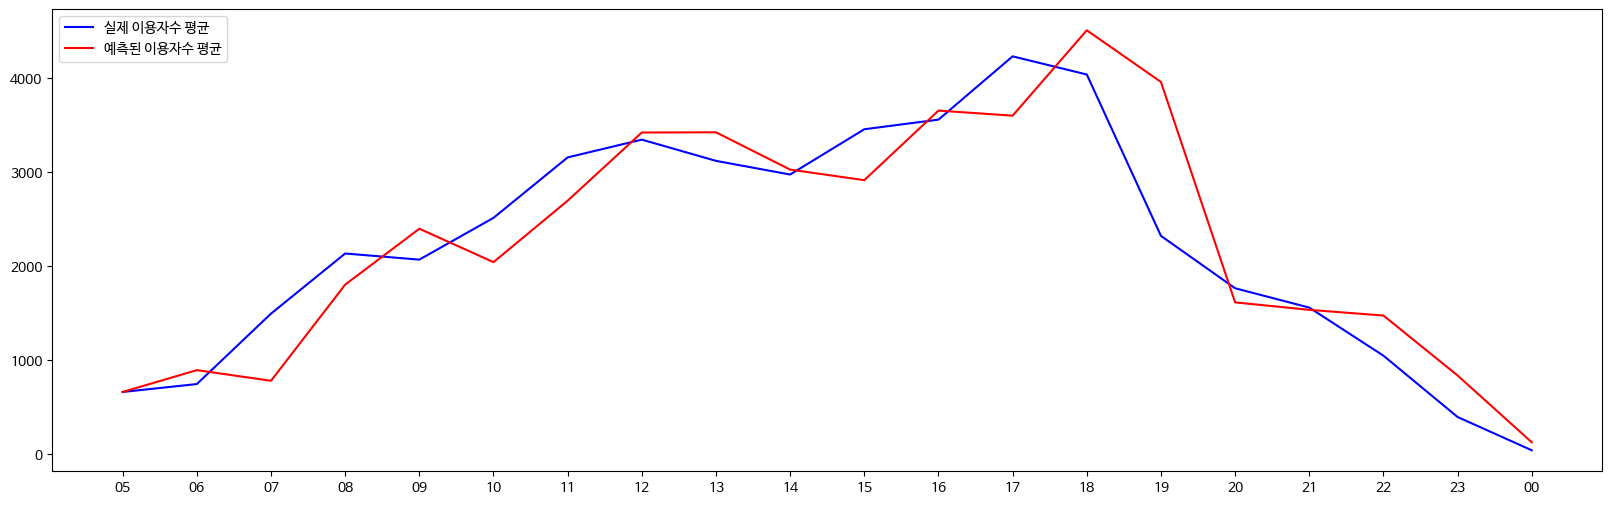

In [ ]:
# Plot
plt.figure(figsize=(20,6))
#plt.plot(train1, label='train_data')
plt.plot(onlytime_서울역['이용자수_평균'], c='b', label='실제 이용자수 평균')
plt.plot(fc2, c='r',label='예측된 이용자수 평균')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.legend(loc='upper left')
plt.show()

### 잠실(송파구청)

In [ ]:
잠실=top3.loc[['잠실(송파구청)']]
잠실
잠실=newdf(잠실)
잠실

,이용자수_평균,시간
04,3.2500,04
05,506.9167,05
06,1019.7500,06
07,1206.7500,07
08,1571.0833,08
09,1526.0833,09
10,1789.8333,10
11,2296.8333,11
12,2502.1667,12
13,2764.4167,13


In [ ]:
onlytime_잠실=잠실.loc[['04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','00','01','02']]
onlytime_잠실

,이용자수_평균,시간
04,3.2500,04
05,506.9167,05
06,1019.7500,06
07,1206.7500,07
08,1571.0833,08
09,1526.0833,09
10,1789.8333,10
11,2296.8333,11
12,2502.1667,12
13,2764.4167,13


In [ ]:
onlytime_잠실["호선_개수"] = [잠실.loc['호선_개수','이용자수_평균']]*len(onlytime_잠실.index)
onlytime_잠실['승강기_개수'] = [잠실.loc['승강기_개수','이용자수_평균']]*len(onlytime_잠실.index)
onlytime_잠실["장애인_편의시설_설치율"] = [잠실.loc['장애인_편의시설_설치율','이용자수_평균']]*len(onlytime_잠실.index)
onlytime_잠실["평균_장애인_승객수"] = [잠실.loc['평균_장애인_승객수','이용자수_평균']]*len(onlytime_잠실.index)
onlytime_잠실["주거_장애인_수"] = [잠실.loc['주거_장애인_수','이용자수_평균']]*len(onlytime_잠실.index)

In [ ]:
onlytime_잠실.set_index("시간", inplace=True)
onlytime_잠실["이용자수_평균"] = onlytime_잠실["이용자수_평균"].astype(float)

In [ ]:
from statsmodels.tsa.stattools import adfuller


# ADF 검정 수행
result = adfuller(onlytime_잠실["이용자수_평균"])

# 결과 출력
print('ADF 검정 통계량:', result[0])
print('P-value:', result[1])
print('사용된 시차:', result[2])
print('관측치 개수:', result[3])
print('임계값:', result[4])
print('결과:', '정상성 만족' if result[1] < 0.05 else '정상성 불만족')

ADF 검정 통계량: -2.112921173169696
P-value: 0.23935077496566204
사용된 시차: 3
관측치 개수: 19
임계값: {'1%': -3.8326031418574136, '5%': -3.0312271701414204, '10%': -2.655519584487535}
결과: 정상성 불만족


In [ ]:
onlytime_잠실_diff1 = onlytime_잠실.diff().dropna()

# ADF 검정 수행
result = adfuller(onlytime_잠실_diff1["이용자수_평균"])

# 결과 출력
print('ADF 검정 통계량:', result[0])
print('P-value:', result[1])
print('사용된 시차:', result[2])
print('관측치 개수:', result[3])
print('임계값:', result[4])
print('결과:', '정상성 만족' if result[1] < 0.05 else '정상성 불만족')

ADF 검정 통계량: -2.0366942440957048
P-value: 0.2707192298239322
사용된 시차: 0
관측치 개수: 21
임계값: {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}
결과: 정상성 불만족


In [ ]:
onlytime_잠실_diff2 = onlytime_잠실_diff1.diff().dropna()

# ADF 검정 수행
result = adfuller(onlytime_잠실_diff2["이용자수_평균"])

# 결과 출력
print('ADF 검정 통계량:', result[0])
print('P-value:', result[1])
print('사용된 시차:', result[2])
print('관측치 개수:', result[3])
print('임계값:', result[4])
print('결과:', '정상성 만족' if result[1] < 0.05 else '정상성 불만족')

ADF 검정 통계량: -4.5059226540603285
P-value: 0.00019185076258578562
사용된 시차: 1
관측치 개수: 19
임계값: {'1%': -3.8326031418574136, '5%': -3.0312271701414204, '10%': -2.655519584487535}
결과: 정상성 만족


=> d=2로 정상성 만족

In [ ]:
# ARIMAX 모델의 최적의 차수 찾기 d=1로 설정(위에서 찾은거 라서)
model = auto_arima(y=onlytime_잠실["이용자수_평균"],
                   exogenous=onlytime_잠실[['호선_개수', '승강기_개수', '장애인_편의시설_설치율', '평균_장애인_승객수', '주거_장애인_수']],
                   seasonal=False,
                   trace=True,
                   d=2)

# 최적의 차수 출력
print(model.order)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=314.353, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=316.372, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=316.323, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=312.432, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.613 seconds
(0, 2, 0)


In [ ]:
# ARIMAX 모델 생성 및 적합
model3 = sm.tsa.ARIMA(onlytime_잠실["이용자수_평균"], order=(0, 2, 0), exog=onlytime_잠실[['호선_개수', '승강기_개수', '장애인_편의시설_설치율', '평균_장애인_승객수', '주거_장애인_수']])
results3 = model3.fit()

# 모델 요약 정보 출력
print(results3.summary())

                               SARIMAX Results                                
Dep. Variable:                이용자수_평균   No. Observations:                   23
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -155.216
Date:                Tue, 07 May 2024   AIC                            322.432
Time:                        12:06:56   BIC                            328.699
Sample:                             0   HQIC                           323.792
                                 - 23                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
호선_개수                 0        nan        nan        nan         nan         nan
승강기_개수                0   1.44e-10          0      1.000   -2.83e-10    2.83e-10
장애인_편의시설_설치율  4.151e-06   2.31e-09   1800.70

In [ ]:
onlytime_잠실

,이용자수_평균,호선_개수,승강기_개수,장애인_편의시설_설치율,평균_장애인_승객수,주거_장애인_수
시간,,,,,,
04,3.2500,2,7.0000,99.4200,18448.4444,20571
05,506.9167,2,7.0000,99.4200,18448.4444,20571
06,1019.7500,2,7.0000,99.4200,18448.4444,20571
07,1206.7500,2,7.0000,99.4200,18448.4444,20571
08,1571.0833,2,7.0000,99.4200,18448.4444,20571
09,1526.0833,2,7.0000,99.4200,18448.4444,20571
10,1789.8333,2,7.0000,99.4200,18448.4444,20571
11,2296.8333,2,7.0000,99.4200,18448.4444,20571
12,2502.1667,2,7.0000,99.4200,18448.4444,20571


In [ ]:
fc3=results3.predict(n_periods=1, exogenous=onlytime_잠실[['호선_개수', '승강기_개수', '장애인_편의시설_설치율', '평균_장애인_승객수', '주거_장애인_수']])
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
prediction_잠실= pd.DataFrame({'이용자수예측':fc1}, index=fc3.index)
prediction_잠실['비율'] = prediction_잠실['이용자수예측'] / prediction_잠실['이용자수예측'].sum()
prediction_잠실

,이용자수예측,비율
시간,,
04,NaN,NaN
05,327.0051,0.0056
06,519.3713,0.0089
07,434.4772,0.0075
08,595.5601,0.0103
09,1036.4354,0.0179
10,1712.4769,0.0295
11,2568.3840,0.0442
12,3497.5515,0.0602


In [ ]:
onlytime_잠실

,이용자수_평균,호선_개수,승강기_개수,장애인_편의시설_설치율,평균_장애인_승객수,주거_장애인_수
시간,,,,,,
04,3.2500,2,7.0000,99.4200,18448.4444,20571
05,506.9167,2,7.0000,99.4200,18448.4444,20571
06,1019.7500,2,7.0000,99.4200,18448.4444,20571
07,1206.7500,2,7.0000,99.4200,18448.4444,20571
08,1571.0833,2,7.0000,99.4200,18448.4444,20571
09,1526.0833,2,7.0000,99.4200,18448.4444,20571
10,1789.8333,2,7.0000,99.4200,18448.4444,20571
11,2296.8333,2,7.0000,99.4200,18448.4444,20571
12,2502.1667,2,7.0000,99.4200,18448.4444,20571


In [ ]:
prediction_잠실 = prediction_잠실[1:21]
prediction_잠실

,이용자수예측,비율
시간,,
05,327.0051,0.0056
06,519.3713,0.0089
07,434.4772,0.0075
08,595.5601,0.0103
09,1036.4354,0.0179
10,1712.4769,0.0295
11,2568.3840,0.0442
12,3497.5515,0.0602
13,5238.4787,0.0902


In [ ]:
onlytime_잠실 = onlytime_잠실[1:21]
fc3 = fc3[1:21]

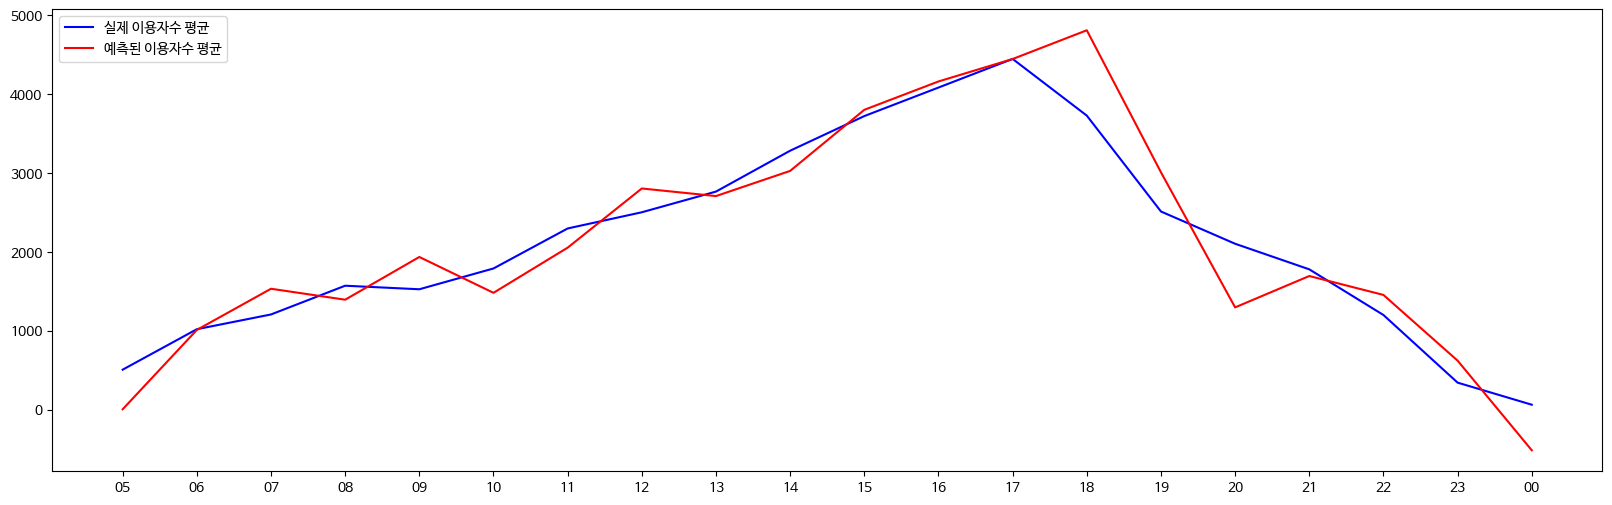

In [ ]:
# Plot
plt.figure(figsize=(20,6))
#plt.plot(train1, label='train_data')
plt.plot(onlytime_잠실['이용자수_평균'], c='b', label='실제 이용자수 평균')
plt.plot(fc3, c='r',label='예측된 이용자수 평균')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.legend(loc='upper left')
plt.show()

## 전체 이용자 평균

In [ ]:
df

,정류장,합계,04,05,06,07,08,09,10,11,...,12월_장애인_승객수,1월_장애인_승객수,2월_장애인_승객수,3월_장애인_승객수,4월_장애인_승객수,5월_장애인_승객수,평균_장애인_승객수,총_장애인_승객수,장애인_편의시설_설치율,승강기_개수
0,가락시장,14858.0000,43.4167,284.3333,367.0833,607.7500,690.5000,699.1667,905.5000,1028.2500,...,16820,13132,12952,14701,13690,13948,6177.0764,74124.9167,99.4200,9.0000
1,가산디지털단지,20509.4167,26.4167,167.5000,262.9167,428.8333,372.2500,441.6667,610.6667,822.9167,...,20981,19026,19638,21660,19960,20916,9136.1111,109633.3333,99.9100,4.0000
2,가양,31726.6667,26.8333,1581.9167,1330.8333,2237.2500,2970.3333,3037.8333,2522.4167,2346.7500,...,34249,27566,27941,31936,31080,31412,13535.7986,162429.5833,99.9000,3.0000
3,강남,23879.4167,7.2500,246.7500,530.0833,493.0833,599.6667,607.4167,1011.5833,1191.8333,...,26125,21984,22708,24815,22851,22939,10408.7569,124905.0833,99.3900,4.0000
4,강남구청,6326.3333,1.2500,106.0000,163.9167,192.1667,181.5000,234.2500,311.5000,289.1667,...,6614,5698,5999,6665,6217,6393,2796.0833,33553.0000,98.9800,2.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,화곡,23547.6667,17.8333,1142.6667,1229.0833,2023.7500,2444.4167,1845.8333,1790.0000,1805.7500,...,24965,20974,21515,24726,23076,23625,10284.0833,123409.0000,99.9000,2.0000
237,화랑대(서울여대입구),7097.0833,19.5000,235.6667,491.1667,742.0000,870.3333,561.4167,479.5000,396.5833,...,7245,6433,6574,7719,7125,7026,3148.6181,37783.4167,99.2800,4.0000
238,회현(남대문시장),19125.2500,2.7500,61.3333,89.1667,186.8333,334.4167,429.2500,632.4167,1077.1667,...,20539,15194,17195,19943,17874,19905,8135.0208,97620.2500,98.4000,2.0000
239,효창공원앞,5460.0833,0.0833,94.8333,200.5000,506.3333,578.7500,356.7500,358.0833,345.5000,...,5669,4589,4926,5710,5248,5651,2358.4167,28301.0000,99.6500,2.0000


In [ ]:
df.columns

Index(['정류장', '합계', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01',
       '02', '호선_개수', '노선', '위도', '경도', '지역구', '주거_장애인_수', '6월_장애인_승객수',
       '7월_장애인_승객수', '8월_장애인_승객수', '9월_장애인_승객수', '10월_장애인_승객수', '11월_장애인_승객수',
       '12월_장애인_승객수', '1월_장애인_승객수', '2월_장애인_승객수', '3월_장애인_승객수', '4월_장애인_승객수',
       '5월_장애인_승객수', '평균_장애인_승객수', '총_장애인_승객수', '장애인_편의시설_설치율', '승강기_개수'],
      dtype='object')

In [ ]:
df_time = df.iloc[:, 3:23]
df_time

,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,00
0,284.3333,367.0833,607.7500,690.5000,699.1667,905.5000,1028.2500,1046.6667,1036.6667,1122.0833,1222.7500,1272.2500,1335.0833,1140.5000,619.4167,495.8333,413.4167,347.6667,147.1667,32.1667
1,167.5000,262.9167,428.8333,372.2500,441.6667,610.6667,822.9167,1014.3333,1303.2500,1189.3333,1653.4167,2460.4167,3046.9167,3347.3333,1360.4167,929.0000,564.3333,376.4167,113.1667,17.8333
2,1581.9167,1330.8333,2237.2500,2970.3333,3037.8333,2522.4167,2346.7500,2586.5000,2370.2500,1955.7500,1892.0000,1797.7500,1786.9167,1359.0833,699.0833,496.5833,344.0833,266.1667,107.7500,10.5833
3,246.7500,530.0833,493.0833,599.6667,607.4167,1011.5833,1191.8333,1373.1667,1575.4167,1853.3333,2402.3333,2572.9167,2514.7500,2174.0000,1278.8333,1094.8333,1159.0833,811.4167,320.0833,61.4167
4,106.0000,163.9167,192.1667,181.5000,234.2500,311.5000,289.1667,261.8333,354.5833,496.0000,609.9167,636.5000,632.0000,735.8333,313.8333,277.5000,296.5833,168.2500,55.6667,8.0833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,1142.6667,1229.0833,2023.7500,2444.4167,1845.8333,1790.0000,1805.7500,1816.0833,1488.8333,1306.3333,1301.5000,1344.9167,1181.7500,1012.8333,641.5833,479.9167,365.3333,210.1667,83.0000,15.6667
237,235.6667,491.1667,742.0000,870.3333,561.4167,479.5000,396.5833,408.7500,428.4167,367.7500,380.2500,730.5833,340.7500,261.0833,125.9167,92.4167,105.9167,37.0833,16.5000,5.5000
238,61.3333,89.1667,186.8333,334.4167,429.2500,632.4167,1077.1667,1459.9167,1803.2500,2135.9167,2376.8333,2420.9167,2409.9167,1717.3333,765.5833,644.8333,330.5000,178.6667,62.8333,5.3333
239,94.8333,200.5000,506.3333,578.7500,356.7500,358.0833,345.5000,403.8333,353.0833,326.7500,394.0833,425.7500,287.0833,303.5000,179.6667,132.4167,127.8333,60.6667,21.4167,3.1667


In [ ]:
df_time.loc["Mean"] = df_time.mean()

In [ ]:
user_avr = df_time.loc["Mean"]

In [ ]:
user_avr = pd.DataFrame(user_avr)

In [ ]:
user_avr.columns=["이용자수_평균"]

In [ ]:
user_avr

,이용자수_평균
05,324.8154
06,428.8098
07,678.2133
08,817.2974
09,746.0664
10,750.4201
11,818.6058
12,895.1120
13,892.6145
14,923.1615


In [ ]:
user_avr["호선_개수"] = df["호선_개수"].mean()
user_avr["승강기_개수"] = df["승강기_개수"].mean()
user_avr["장애인_편의시설_설치율"] = df["장애인_편의시설_설치율"].mean()
user_avr["평균_장애인_승객수"] = df["평균_장애인_승객수"].mean()
user_avr["주거_장애인_수"] = df["주거_장애인_수"].mean()

In [ ]:
user_avr

,이용자수_평균,호선_개수,승강기_개수,장애인_편의시설_설치율,평균_장애인_승객수,주거_장애인_수
05,324.8154,1.3817,3.4938,99.2105,5538.2180,15880.6680
06,428.8098,1.3817,3.4938,99.2105,5538.2180,15880.6680
07,678.2133,1.3817,3.4938,99.2105,5538.2180,15880.6680
08,817.2974,1.3817,3.4938,99.2105,5538.2180,15880.6680
09,746.0664,1.3817,3.4938,99.2105,5538.2180,15880.6680
10,750.4201,1.3817,3.4938,99.2105,5538.2180,15880.6680
11,818.6058,1.3817,3.4938,99.2105,5538.2180,15880.6680
12,895.1120,1.3817,3.4938,99.2105,5538.2180,15880.6680
13,892.6145,1.3817,3.4938,99.2105,5538.2180,15880.6680
14,923.1615,1.3817,3.4938,99.2105,5538.2180,15880.6680


In [ ]:
# ADF 검정 수행
result = adfuller(user_avr["이용자수_평균"])

# 결과 출력
print('ADF 검정 통계량:', result[0])
print('P-value:', result[1])
print('사용된 시차:', result[2])
print('관측치 개수:', result[3])
print('임계값:', result[4])
print('결과:', '정상성 만족' if result[1] < 0.05 else '정상성 불만족')

ADF 검정 통계량: -1.1802980598456256
P-value: 0.6820130548077584
사용된 시차: 6
관측치 개수: 13
임계값: {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}
결과: 정상성 불만족


In [ ]:
user_avr_diff1 = user_avr.diff().dropna()

# ADF 검정 수행
result = adfuller(user_avr_diff1["이용자수_평균"])

# 결과 출력
print('ADF 검정 통계량:', result[0])
print('P-value:', result[1])
print('사용된 시차:', result[2])
print('관측치 개수:', result[3])
print('임계값:', result[4])
print('결과:', '정상성 만족' if result[1] < 0.05 else '정상성 불만족')

ADF 검정 통계량: -2.175308508248616
P-value: 0.21532876623282188
사용된 시차: 0
관측치 개수: 18
임계값: {'1%': -3.859073285322359, '5%': -3.0420456927297668, '10%': -2.6609064197530863}
결과: 정상성 불만족


In [ ]:
user_avr_diff2 = user_avr_diff1.diff().dropna()

# ADF 검정 수행
result = adfuller(user_avr_diff2["이용자수_평균"])

# 결과 출력
print('ADF 검정 통계량:', result[0])
print('P-value:', result[1])
print('사용된 시차:', result[2])
print('관측치 개수:', result[3])
print('임계값:', result[4])
print('결과:', '정상성 만족' if result[1] < 0.05 else '정상성 불만족')

ADF 검정 통계량: -4.992422737413345
P-value: 2.2972378640213336e-05
사용된 시차: 0
관측치 개수: 17
임계값: {'1%': -3.889265672705068, '5%': -3.0543579727254224, '10%': -2.66698384083045}
결과: 정상성 만족


In [ ]:
# ARIMAX 모델의 최적의 차수 찾기
model = auto_arima(y=user_avr["이용자수_평균"],
                   exogenous=user_avr[['호선_개수', '승강기_개수',
                                       '장애인_편의시설_설치율',
                                       '평균_장애인_승객수',
                                       '주거_장애인_수']],
                   seasonal=False,
                   trace=True,
                   d=2)

# 최적의 차수 출력
print(model.order)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=229.614, Time=0.92 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=229.078, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=230.243, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=227.181, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.945 seconds
(0, 2, 0)


In [ ]:
# ARIMAX 모델 생성 및 적합
model4 = sm.tsa.ARIMA(user_avr["이용자수_평균"], order=(0, 2, 0), exog=user_avr[['호선_개수', '승강기_개수', '장애인_편의시설_설치율', '평균_장애인_승객수', '주거_장애인_수']])
results4 = model4.fit()

# 모델 요약 정보 출력
print(results4.summary())

                               SARIMAX Results                                
Dep. Variable:                이용자수_평균   No. Observations:                   20
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -112.591
Date:                Tue, 07 May 2024   AIC                            237.181
Time:                        12:07:00   BIC                            242.523
Sample:                             0   HQIC                           237.918
                                 - 20                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
호선_개수          2.88e-06   6.41e-12   4.49e+05      0.000    2.88e-06    2.88e-06
승강기_개수         2.88e-06   2.98e-12   9.67e+05      0.000    2.88e-06    2.88e-06
장애인_편의시설_설치율          0   1.72e-10          

In [ ]:
fc4=results4.predict(n_periods=1, exogenous=onlytime_잠실[['호선_개수', '승강기_개수', '장애인_편의시설_설치율', '평균_장애인_승객수', '주거_장애인_수']])
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
prediction_user_avr= pd.DataFrame({'이용자수예측':fc1}, index=fc4.index)
prediction_user_avr['비율'] = prediction_user_avr['이용자수예측'] / prediction_user_avr['이용자수예측'].sum()
prediction_user_avr

,이용자수예측,비율
05,327.0051,0.0056
06,519.3713,0.0089
07,434.4772,0.0075
08,595.5601,0.0103
09,1036.4354,0.0179
10,1712.4769,0.0295
11,2568.3840,0.0442
12,3497.5515,0.0602
13,5238.4787,0.0902
14,4682.5206,0.0806


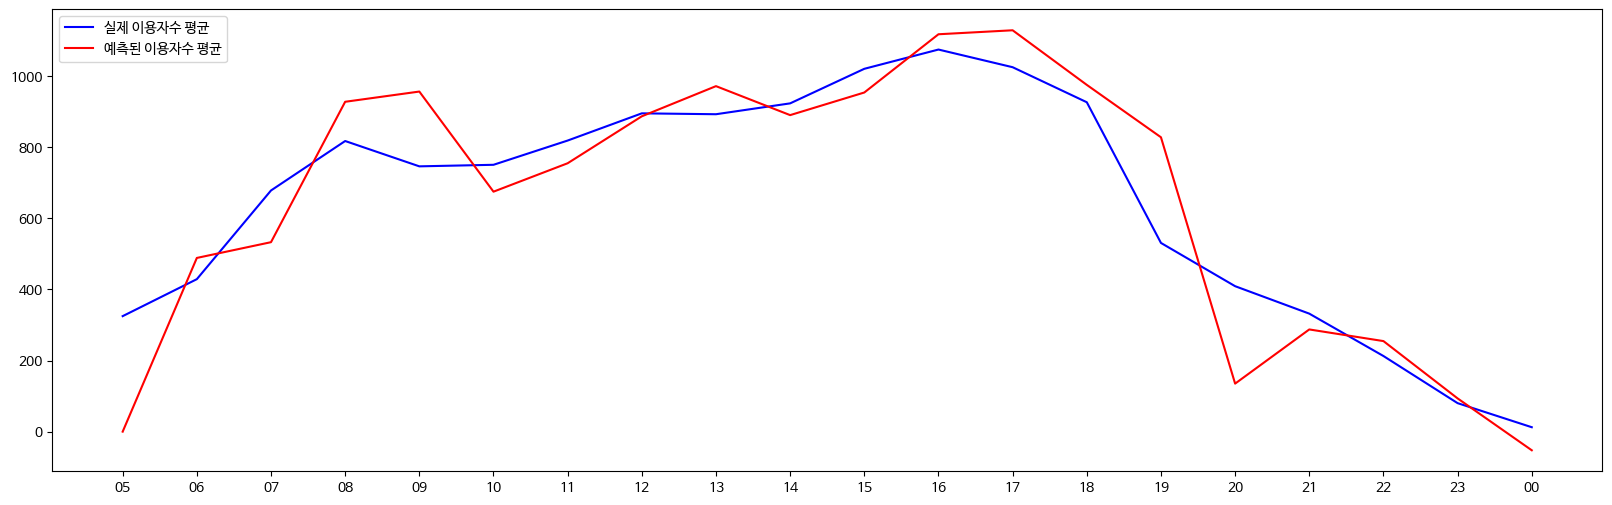

In [ ]:
# Plot
plt.figure(figsize=(20,6))
#plt.plot(train1, label='train_data')
plt.plot(user_avr['이용자수_평균'], c='b', label='실제 이용자수 평균')
plt.plot(fc4, c='r',label='예측된 이용자수 평균')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.legend(loc='upper left')
plt.show()